<img src="https://raw.githubusercontent.com/OpenEnergyPlatform/academy/develop/docs/data/img/OEP_logo_2_no_text.svg" alt="OpenEnergy Platform" height="75" width="75" align="left"/>

# Collect eGoDP data using oedialect

Repository: https://github.com/openego/oedialect

Please report bugs and improvements here: https://github.com/OpenEnergyPlatform/oedialect/issues <br>
Using SAIO functions to setup SqlAlchemy classes: https://github.com/coroa/saio

In [1]:
__copyright__ = "Reiner Lemoine Institut"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/openego/data_processing/blob/master/LICENSE"
__author__    = "Ludee"

In [2]:
# pip install oedialect pandas "sqlalchemy~=1.3,<1.4" geopandas matplotlib saio

import os
import getpass

import pandas as pd
import sqlalchemy as sa
from sqlalchemy.orm import sessionmaker
import oedialect


import matplotlib.pyplot as plt
import saio

## Connection to OEP

If we want to upload data to the OEP we first need to connect to it, using our OEP user name and token. 
Note: You ca view your token on your OEP profile page after logging in.  


In [3]:
# NEVER commit your token to a repository
# get your token from an environment variable
# or ask user
token = os.environ.get("OEP_API_TOKEN") or getpass.getpass('Token:')

Now we'll create an sql-alchemy-engine. The engine is what 'speaks' oedialect to the data base api. We need to tell it where the data base is and pass our credentials.


In [4]:
# Create Engine:
oep_host = 'openenergy-platform.org'
oed_string = f'postgresql+oedialect://:{token}@{oep_host}'

engine = sa.create_engine(oed_string)
metadata = sa.MetaData(bind=engine)
print(metadata)

MetaData(bind=Engine(postgresql+oedialect://:***@openenergy-platform.org))


## Setup ORM

In [5]:
saio.register_schema("boundaries", engine)
saio.register_schema("grid", engine)
saio.register_schema("supply", engine)

In [6]:
# Included in SAIO
# from sqlalchemy.ext.declarative import declarative_base
# Base = declarative_base()
# metadata = Base.metadata
# metadata.bind=engine

## Get data

### Bundesländer

In [7]:
from saio.boundaries import bkg_vg250_2_lan as BkgVg250Lan

In [8]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_lan = saio.as_pandas(session.query(BkgVg250Lan))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()    
    print('Querry incomplete!')
    raise
finally:
    session.close()

Querry successful!


c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


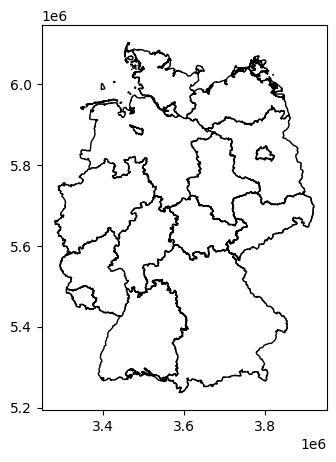

In [9]:
ax = df_lan.plot(figsize=(5, 5), color='white', edgecolor='black')

### Kreise

In [10]:
from saio.boundaries import bkg_vg250_4_krs as BkgVg250Krs

In [11]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_krs = saio.as_pandas(session.query(BkgVg250Krs))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()    
    print('Querry incomplete!')
    raise
finally:
    session.close()

Querry successful!


c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

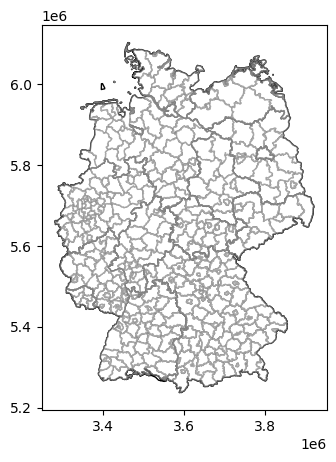

In [12]:
ax = df_lan.plot(figsize=(5, 5), color='white', edgecolor='black')
df_krs.plot(ax=ax, alpha=0.5, color='white', edgecolor='grey')

### eGoDP - EHV

In [13]:
from saio.grid import ego_dp_ehv_substation as eGoEHVSub
from saio.grid import ego_dp_ehv_griddistrict as eGoEHVGD

In [14]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_ehvsub = saio.as_pandas(session.query(eGoEHVSub), geometry='point')
    df_ehvgd = saio.as_pandas(session.query(eGoEHVGD))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()    
    print('Querry incomplete!')
    raise
finally:
    session.close()

c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Querry successful!


c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code

(3888119.089487874, 4827604.8328158, 2454107.801562896, 3773079.9792611585)

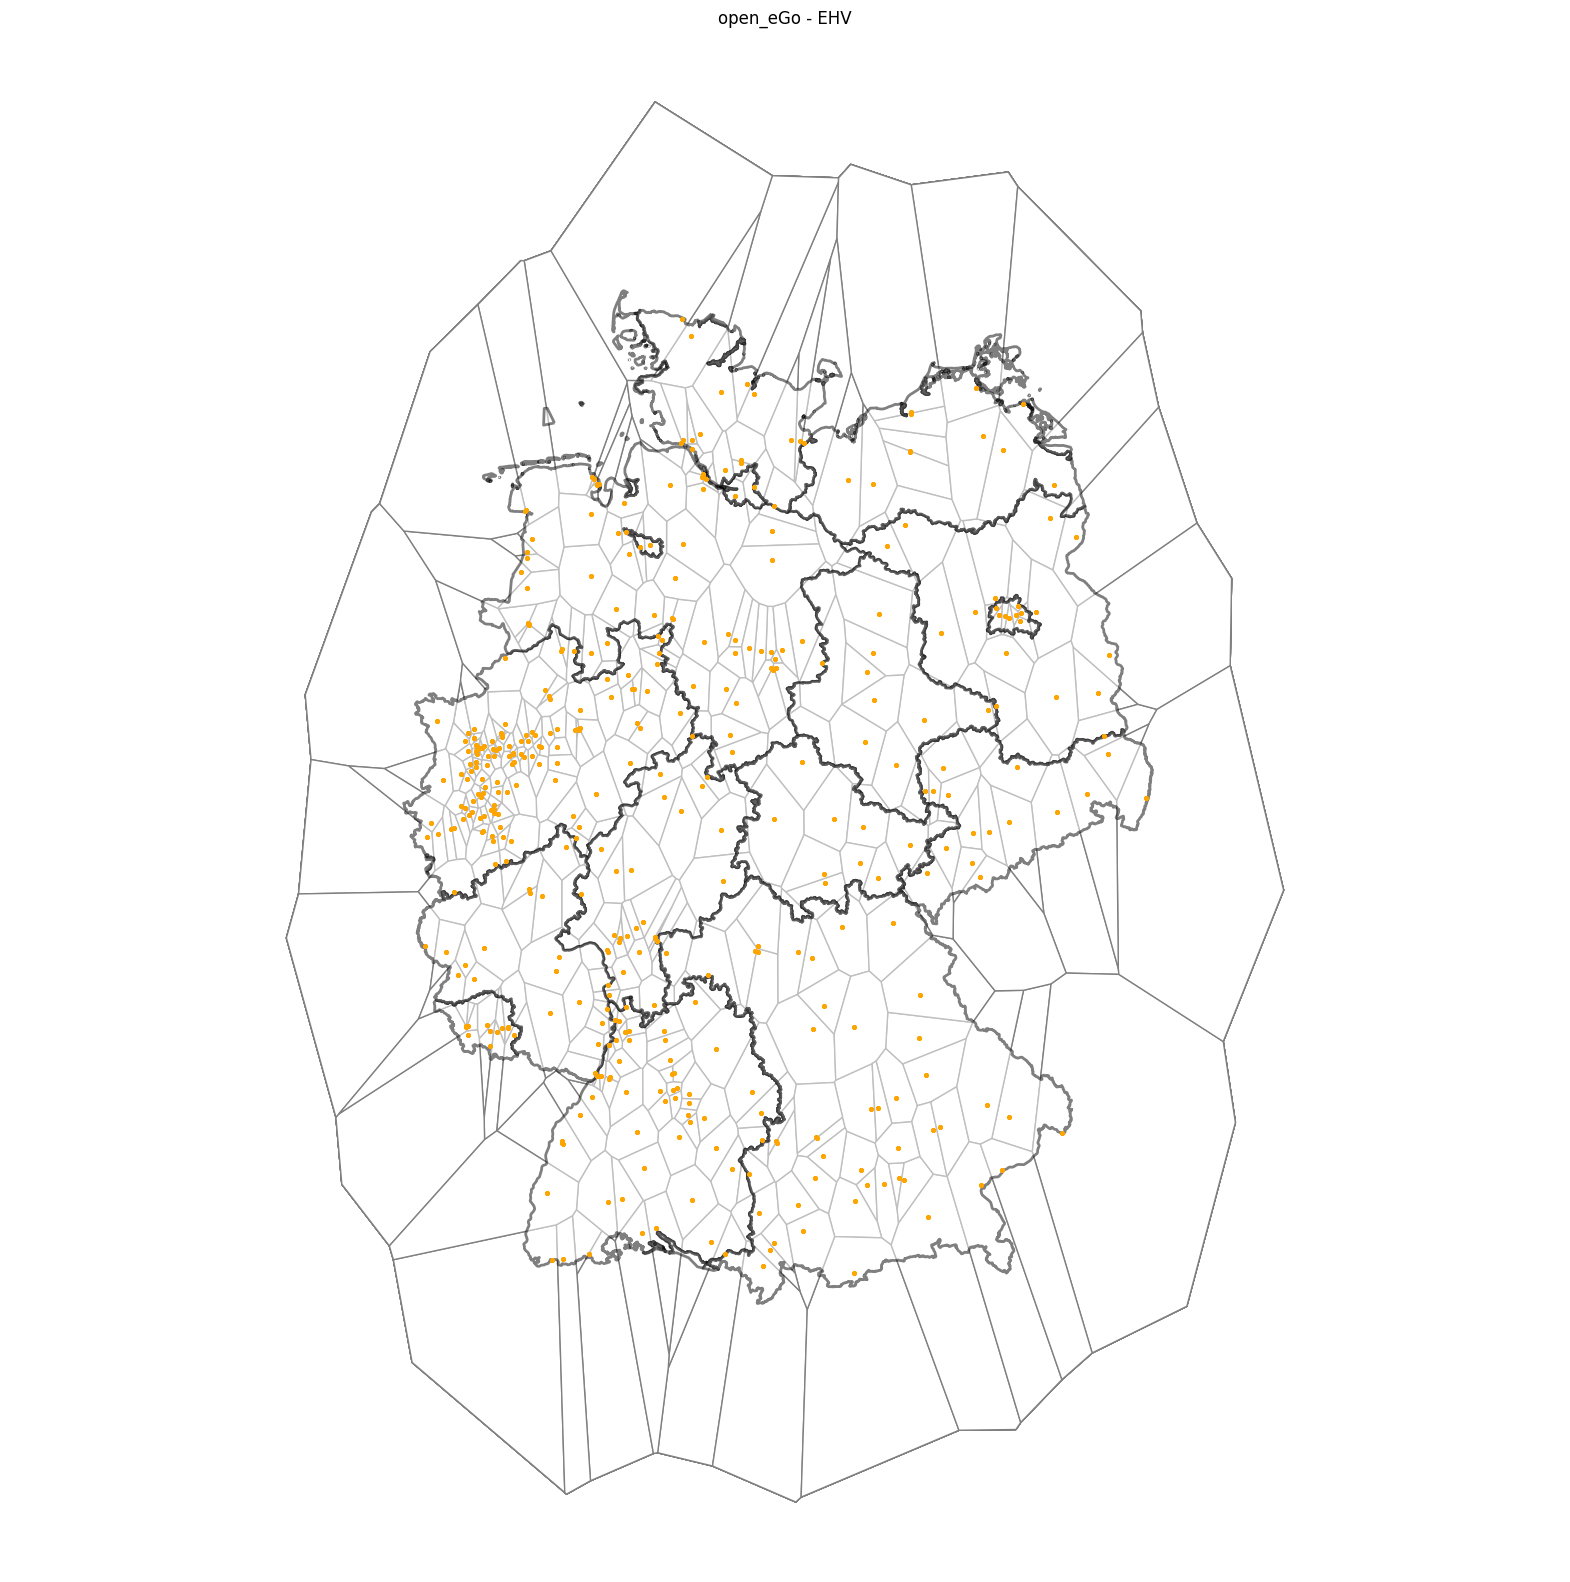

In [15]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('open_eGo - EHV')

df_ehvgd.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='white', edgecolor='grey', linewidth=1)

df_lan.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='white', alpha=.5, edgecolor='black', linewidth=2)

df_ehvsub.to_crs({'init': 'epsg:3035'}).plot(ax=ax, marker='o', color='orange', markersize=5)

plt.axis('equal')

### eGoDP - MV

In [16]:
from saio.grid import ego_dp_hvmv_substation as eGoHVMVSub
from saio.grid import ego_dp_mv_griddistrict as eGoMVGD

In [17]:
Session = sessionmaker(bind=engine)
session = Session()
try:
    df_hvmvsub = saio.as_pandas(session.query(eGoHVMVSub))
    df_mvgd = saio.as_pandas(session.query(eGoMVGD))
    session.commit()
    print('Querry successful!')
except Exception as e:
    session.rollback()    
    print('Querry incomplete!')
    raise
finally:
    session.close()

c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Querry successful!


c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\c.winger\nobackup\git\oep-tutorial\.env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code

(3999252.3081790204, 4704587.528240574, 2640706.9317357074, 3594814.5289753107)

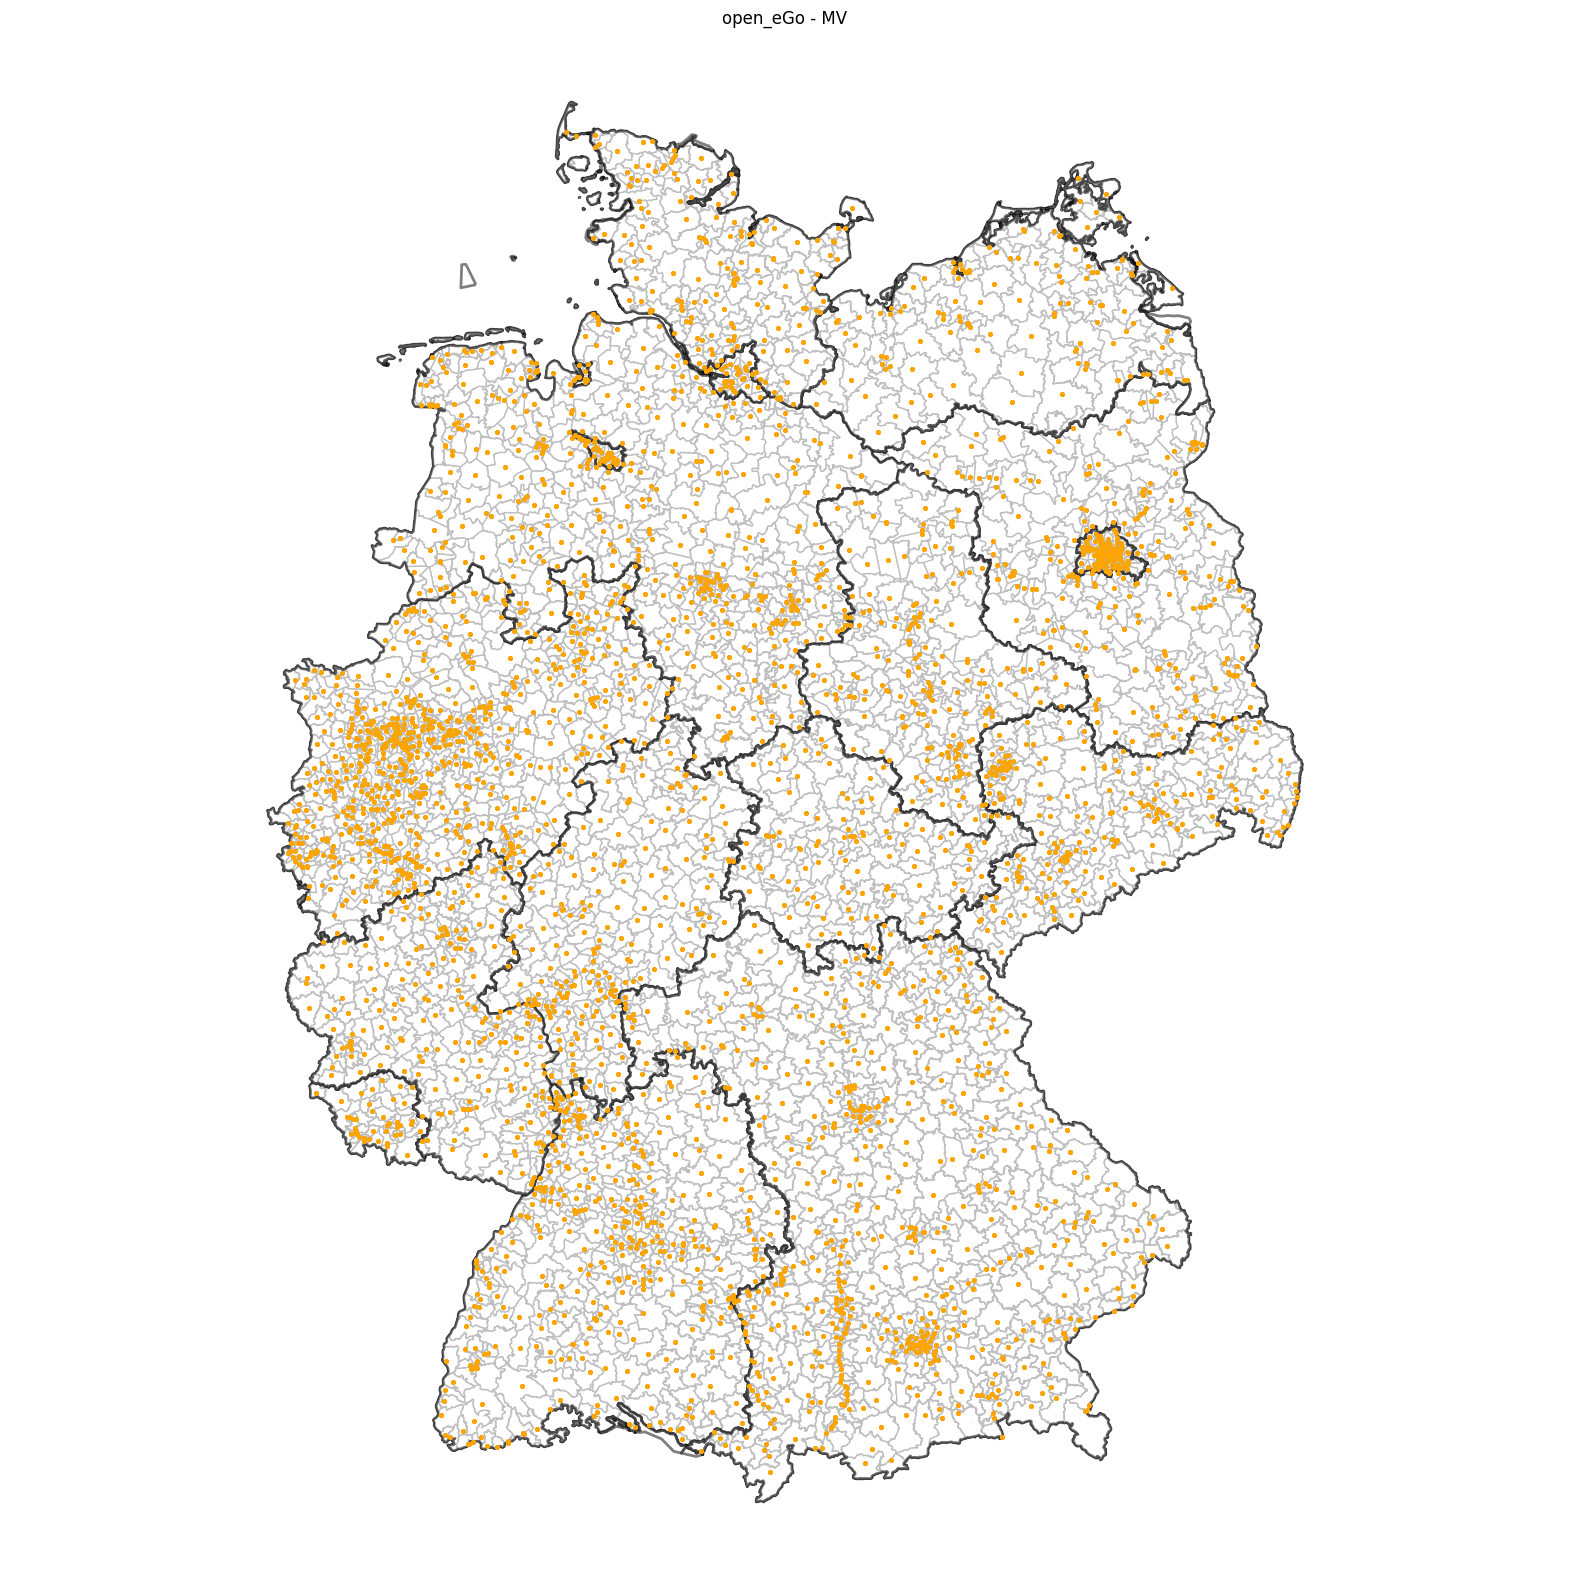

In [18]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.set_aspect('equal')
ax.set_axis_off()
ax.set_title('open_eGo - MV')

df_mvgd.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='white', edgecolor='grey', linewidth=1)

df_lan.to_crs({'init': 'epsg:3035'}).plot(ax=ax, color='white', alpha=.5, edgecolor='black', linewidth=2)

df_hvmvsub.to_crs({'init': 'epsg:3035'}).plot(ax=ax, marker='o', color='orange', markersize=5)

plt.axis('equal')